In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns

### **Yfinance로 코스피 월말만 추출** 

In [63]:
df =  yf.download(['^KS11'], start='2005-01-03', end='2022-04-25')['Close']
df = df.dropna()

print(df)

df = df.reset_index()
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

df1 = df.sort_values(by=['year','month','day'], ascending=True).drop_duplicates(subset=['year', 'month'], keep='last')
df2 = df1.drop(["year", "month", "day"], axis=1)
df3 = df2.set_index("Date")


[*********************100%***********************]  1 of 1 completed
Date
2005-01-03     893.710022
2005-01-04     886.900024
2005-01-05     885.190002
2005-01-06     871.280029
2005-01-07     870.840027
                 ...     
2022-04-18    2693.209961
2022-04-19    2718.889893
2022-04-20    2718.689941
2022-04-21    2728.209961
2022-04-22    2704.709961
Name: Close, Length: 4275, dtype: float64


In [64]:
df3.round(2)


,Close
Date,
2005-01-31,932.70
2005-02-28,1011.36
2005-03-31,965.68
2005-04-29,911.30
2005-05-31,970.21
...,...
2021-12-30,2977.65
2022-01-28,2663.34
2022-02-28,2699.18


In [65]:
df3.reset_index(inplace=True)
df3.head(3)

,Date,Close
0,2005-01-31,932.700012
1,2005-02-28,1011.359985
2,2005-03-31,965.679993


##### **월 등락률 계산 후  새로운 칼럼만들기**

In [66]:
df3["전월대비 등락률"] = (df3["Close"]-df3["Close"].shift(1))/df3["Close"].shift(1)
df3

,Date,Close,전월대비 등락률
0,2005-01-31,932.700012,NaN
1,2005-02-28,1011.359985,0.084336
2,2005-03-31,965.679993,-0.045167
3,2005-04-29,911.299988,-0.056313
4,2005-05-31,970.210022,0.064644
...,...,...,...
203,2021-12-30,2977.649902,0.048834
204,2022-01-28,2663.340088,-0.105556
205,2022-02-28,2699.179932,0.013457
206,2022-03-31,2757.649902,0.021662


In [67]:
#칼럼이름 바꾸기
df3.columns = ['날짜', '종가', '전월대비 등락률']

In [68]:
df3.head(3)

,날짜,종가,전월대비 등락률
0,2005-01-31,932.700012,NaN
1,2005-02-28,1011.359985,0.084336
2,2005-03-31,965.679993,-0.045167


In [70]:
#데이터이름 바꾸기
df_yfin = df3 
df_yfin.head(3)

,날짜,종가,전월대비 등락률
0,2005-01-31,932.700012,NaN
1,2005-02-28,1011.359985,0.084336
2,2005-03-31,965.679993,-0.045167


#### **전월대비 등락률NAN값 대체값 만들기**
: FinanceDataReader로 코스피 원래 값 불러와서

In [ ]:
# df3.to_csv('/content/drive/MyDrive/Finance data/전월대비_등락률.csv')

##### **yfinance로 불러온 데이터 NAN값(1행) 채우기**
(feat. 2004/12/01 - 2005/02/01 데이터 뽑아서)

In [71]:
#코스피 종가, 등락률 불러오기
kospi_df = fdr.DataReader('KS11', '2004-12-01','2005-02-01')
kospi_df.head(3)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2004-12-01,876.80,874.47,878.91,871.13,316630000.0,-0.0014
2004-12-02,884.10,891.14,893.51,882.58,335560000.0,0.0083
2004-12-03,882.55,890.59,893.42,877.46,331020000.0,-0.0018


In [72]:
df_yfin["전월대비 등락률"][0] = (kospi_df['Close']['2005-01-31'] - kospi_df['Close']['2004-12-30'])/kospi_df['Close']['2004-12-30']

C:\Users\user\AppData\Local\Temp\ipykernel_14268\1503013230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yfin["전월대비 등락률"][0] = (kospi_df['Close']['2005-01-31'] - kospi_df['Close']['2004-12-30'])/kospi_df['Close']['2004-12-30']


#### **전월대비 등락률 마지막행 대체값 만들기**
: FinanceDataReader로 2022/03/01 - 2022/05/01 사이 값

In [73]:
kospi_df_2 = fdr.DataReader('KS11', '2022-03-01','2022-05-01')
kospi_df_2.head(3)


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-03-02,2703.52,2698.31,2716.46,2692.24,527950000.0,0.0016
2022-03-03,2747.08,2729.86,2748.21,2726.35,614510000.0,0.0161
2022-03-04,2713.43,2736.58,2736.58,2702.34,765680000.0,-0.0122


In [74]:
df_yfin["전월대비 등락률"][207] = (kospi_df_2['Close']['2022-04-29'] - kospi_df_2['Close']['2022-03-31'])/kospi_df_2['Close']['2022-03-31']

C:\Users\user\AppData\Local\Temp\ipykernel_14268\1116438837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yfin["전월대비 등락률"][207] = (kospi_df_2['Close']['2022-04-29'] - kospi_df_2['Close']['2022-03-31'])/kospi_df_2['Close']['2022-03-31']


**yfinance로 월말 코스피 추출 후 등락률까지 계산한 데이터 셋완성** : df_yfin

In [75]:
df_yfin.head(5)

,날짜,종가,전월대비 등락률
0,2005-01-31,932.700012,0.041053
1,2005-02-28,1011.359985,0.084336
2,2005-03-31,965.679993,-0.045167
3,2005-04-29,911.299988,-0.056313
4,2005-05-31,970.210022,0.064644


#### **df_yin에서 일별 매수량 이상치 제거 후 월별로 합한 데이터 셋(df2) 붙이는 과정** 

1. 일별 외국인 순매수 데이터 불러오기 pre_kospi

In [76]:
df = pd.read_csv('./data/pre_kospi.csv')
df.head(3)
df.shape #4281개행

(4281, 7)

In [77]:
#외국인 순매수 이상치를 제거하기 위해 다섯수치요약 확인하기
df['외국인순매수'].describe()

count     4281.000000
mean      -143.726933
std       2974.159679
min     -28174.000000
25%      -1506.000000
50%        -63.000000
75%       1322.000000
max      17182.000000
Name: 외국인순매수, dtype: float64

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missin

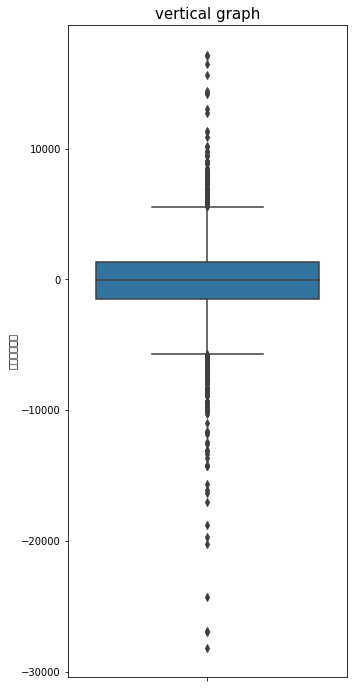

In [37]:
# box-plot 그래프로 이상치 분포 확인하기
plt.figure(figsize = (5,12))
sns.boxplot(y='외국인순매수', data = df)
plt.title('vertical graph', size = 15)
plt.show()

In [78]:
#이상치 제거 함수 get_outlier 만들기
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df['외국인순매수'].values, 25)
  quantile_75 = np.percentile(df['외국인순매수'].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df['외국인순매수'][ (df['외국인순매수'] < lowest) | (df['외국인순매수'] > highest) ].index
  return outlier_idx

In [79]:
# 함수 사용해서 이상치 index 뽑기
outlier_idx = get_outlier(df=df, column='외국인순매수', weight=1.5)
outlier_idx

Int64Index([   0,   12,   13,   22,   29,   30,   31,   34,   35,   40,
            ...
            3629, 3642, 3644, 3649, 3650, 3794, 3934, 3950, 3962, 4014],
           dtype='int64', length=221)

In [80]:
#이상치데이터만 추출 (221개 행)
df['외국인순매수'][outlier_idx].shape


(221,)

In [81]:
#이상치 포함 행 삭제
outlier_idx = get_outlier(df=df, column='외국인순매수', weight=1.5)
df2 = df.drop(outlier_idx, axis=0)
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2 #최종적으로 4060개 행 남음

,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,2718.89,0.0095,2022-04-19,-3431,331,3364
5,2693.21,-0.0011,2022-04-18,1020,-947,-188
...,...,...,...,...,...,...
4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,886.90,-0.0076,2005-01-04,-63,397,-334


#### df2의 날짜(2xxx-xx-xx) 형식을 datetime으로 바꾸고 년도/월 뽑기

In [82]:
df2['날짜']=pd.to_datetime(df2['날짜'])

In [83]:
# 년도/월만 뽑아 새로운 칼럼 생성
df2['년도']=df2['날짜'].dt.strftime("%Y ")
df2['월']=df2['날짜'].dt.strftime("%m")
df2.head(5)

,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수,년도,월
1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975,2022,04
2,2728.21,0.0035,2022-04-21,-5667,-597,6366,2022,04
3,2718.69,-0.0001,2022-04-20,738,948,-1612,2022,04
4,2718.89,0.0095,2022-04-19,-3431,331,3364,2022,04
5,2693.21,-0.0011,2022-04-18,1020,-947,-188,2022,04


##### 년도, 월별로 외국인 순매수량 group by

In [84]:
df2=df2.groupby(['년도','월'],as_index=False).sum()
df2.head(5)

,년도,월,종가,등락율,개인순매수,외국인순매수,기관순매수
0,2005,01,18970.33,0.0415,-9523,8538,984
1,2005,02,16396.13,0.0820,-5725,14654,-8928
2,2005,03,21741.01,-0.0448,3820,-20741,16920
3,2005,04,19108.21,-0.0567,2291,-3243,955
4,2005,05,19718.57,0.0636,-18304,1048,17254


In [85]:
#데이터 이름 foreign으로 바꾸기
foreign=df2
foreign.head(3)

,년도,월,종가,등락율,개인순매수,외국인순매수,기관순매수
0,2005,01,18970.33,0.0415,-9523,8538,984
1,2005,02,16396.13,0.0820,-5725,14654,-8928
2,2005,03,21741.01,-0.0448,3820,-20741,16920


#### **df_yfin과 df2 날짜 형식 맞추기**

In [86]:
#df_jung 날짜 편집하기
df_yfin['날짜']=pd.to_datetime(df_yfin['날짜'])
df_yfin['년도']=df_yfin['날짜'].dt.strftime("%Y ")
df_yfin['월']=df_yfin['날짜'].dt.strftime("%m")

In [87]:
df_yfin['date'] = df_yfin['년도'] + df_yfin['월']
df_yfin.head(3)

,날짜,종가,전월대비 등락률,년도,월,date
0,2005-01-31,932.700012,0.041053,2005,01,2005 01
1,2005-02-28,1011.359985,0.084336,2005,02,2005 02
2,2005-03-31,965.679993,-0.045167,2005,03,2005 03


#### **df_yfin(코스피 등락률 계산된)에 외국인순매수량 합치기**

In [88]:
df_yfin['외국인순매수'] = foreign['외국인순매수']
# df_yfin.drop('날짜', axis =1 , inplace = True)

In [89]:
df_yfin.head(3)

,날짜,종가,전월대비 등락률,년도,월,date,외국인순매수
0,2005-01-31,932.700012,0.041053,2005,01,2005 01,8538
1,2005-02-28,1011.359985,0.084336,2005,02,2005 02,14654
2,2005-03-31,965.679993,-0.045167,2005,03,2005 03,-20741


#### **최종데이터셋(finish_data) 완성** ###

In [91]:
finish_data = df_yfin
finish_data

,날짜,종가,전월대비 등락률,년도,월,date,외국인순매수
0,2005-01-31,932.700012,0.041053,2005,01,2005 01,8538
1,2005-02-28,1011.359985,0.084336,2005,02,2005 02,14654
2,2005-03-31,965.679993,-0.045167,2005,03,2005 03,-20741
3,2005-04-29,911.299988,-0.056313,2005,04,2005 04,-3243
4,2005-05-31,970.210022,0.064644,2005,05,2005 05,1048
...,...,...,...,...,...,...,...
203,2021-12-30,2977.649902,0.048834,2021,12,2021 12,15250
204,2022-01-28,2663.340088,-0.105556,2022,01,2022 01,-389
205,2022-02-28,2699.179932,0.013457,2022,02,2022 02,-6207
206,2022-03-31,2757.649902,0.021662,2022,03,2022 03,-23373


In [92]:
finish_data.to_csv('이상치제거한월별외국인순매수와종가합.csv')